In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_feather('cleaned_vehicle_data.feather')
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015.0,kia,sorento,lx,suv,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,2014-12-16 04:30:00+00:00
1,2015.0,kia,sorento,lx,suv,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,2014-12-16 04:30:00+00:00
2,2014.0,bmw,3 series,other,sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,2015-01-14 20:30:00+00:00
3,2015.0,volvo,s60,t5,sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,2015-01-28 20:30:00+00:00
4,2014.0,bmw,6 series gran coupe,650i,sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),14570.0,13840.0,2014-12-18 04:30:00+00:00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 546296 entries, 0 to 550296
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype              
---  ------        --------------   -----              
 0   year          546296 non-null  float64            
 1   make          546296 non-null  object             
 2   model         546296 non-null  object             
 3   trim          546296 non-null  object             
 4   body          546296 non-null  object             
 5   transmission  546296 non-null  object             
 6   vin           546296 non-null  object             
 7   state         546296 non-null  object             
 8   condition     546296 non-null  float64            
 9   odometer      546296 non-null  float64            
 10  color         546296 non-null  object             
 11  interior      546296 non-null  object             
 12  seller        546296 non-null  object             
 13  mmr           546296 non-null  float64           

In [4]:
df.describe(include='all')

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,546296.000000,546296,546296,546296,546296,546296,546296,546296,546296.000000,546296.000000,546296,546296,546296,546296.000000,546296.000000,546283
unique,NaN,45,459,520,47,3,546296,39,NaN,NaN,11,12,14006,NaN,NaN,NaN
top,NaN,ford,altima,base,sedan,automatic,5xyktca69fg566472,fl,NaN,NaN,gray,black,nissan-infiniti lt,NaN,NaN,NaN
freq,NaN,92045,19218,54198,236259,465577,1,81260,NaN,NaN,163645,240380,19675,NaN,NaN,NaN
mean,2010.151196,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.909276,64964.433693,NaN,NaN,NaN,12946.614949,12685.043334,2015-03-06 02:07:26.145349888+00:00
min,1998.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,25.000000,1.000000,2014-01-01 01:15:00+00:00
25%,2008.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.000000,28004.000000,NaN,NaN,NaN,7200.000000,6750.000000,2015-01-20 18:00:00+00:00
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,50869.500000,NaN,NaN,NaN,12150.000000,11800.000000,2015-02-12 17:30:00+00:00
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.000000,96540.000000,NaN,NaN,NaN,17600.000000,17500.000000,2015-05-21 19:00:00+00:00
max,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.000000,205574.000000,NaN,NaN,NaN,35100.000000,35100.000000,2015-07-20 19:30:00+00:00


Distribution of Target Variable

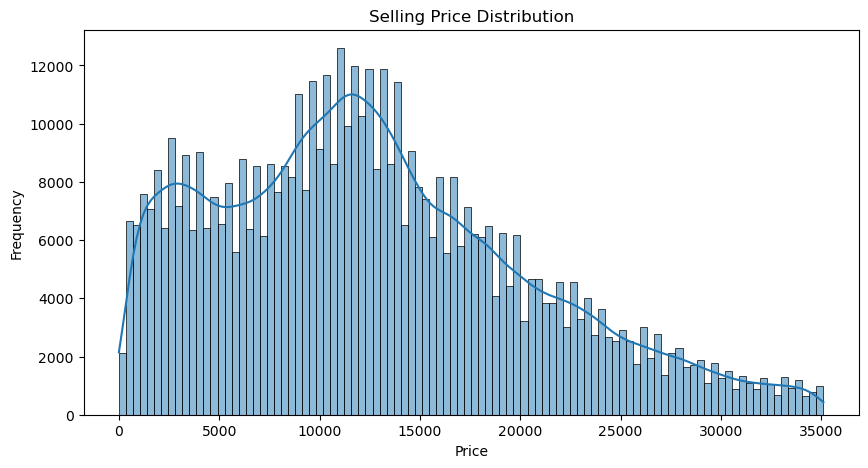

In [5]:
plt.figure(figsize=(10, 5))
sns.histplot(df['sellingprice'], bins=100, kde=True)
plt.title('Selling Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The above histogram confirms a strong right-skew in selling prices, with most vehicles clustering around the £10,000–£15,000 range and a long tail of higher-priced cars.

Text(0.5, 1.0, 'Selling Price vs. Odometer')

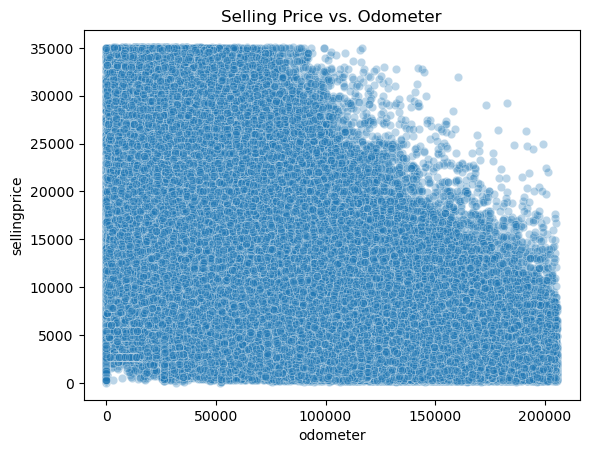

In [6]:
sns.scatterplot(x='odometer', y='sellingprice', data=df, alpha=0.3)
plt.title('Selling Price vs. Odometer')

Key Observations
- Negative Correlation: As odometer readings increase, selling prices tend to decrease. This reflects the natural depreciation of vehicles with usage.
- High-Value Outliers at Low Mileage: Vehicles with very low mileage often command premium prices — likely newer models, luxury brands, or well-maintained used cars.
- Flattening at High Mileage: Beyond ~150,000 miles, prices plateau or drop sharply. These vehicles may be older, riskier, or nearing end-of-life.
- Scattered High-Price Points: Some high-priced vehicles still have moderate mileage — these could be performance or luxury models (e.g., BMW M-series, Mercedes AMG) where brand and trim outweigh mileage.

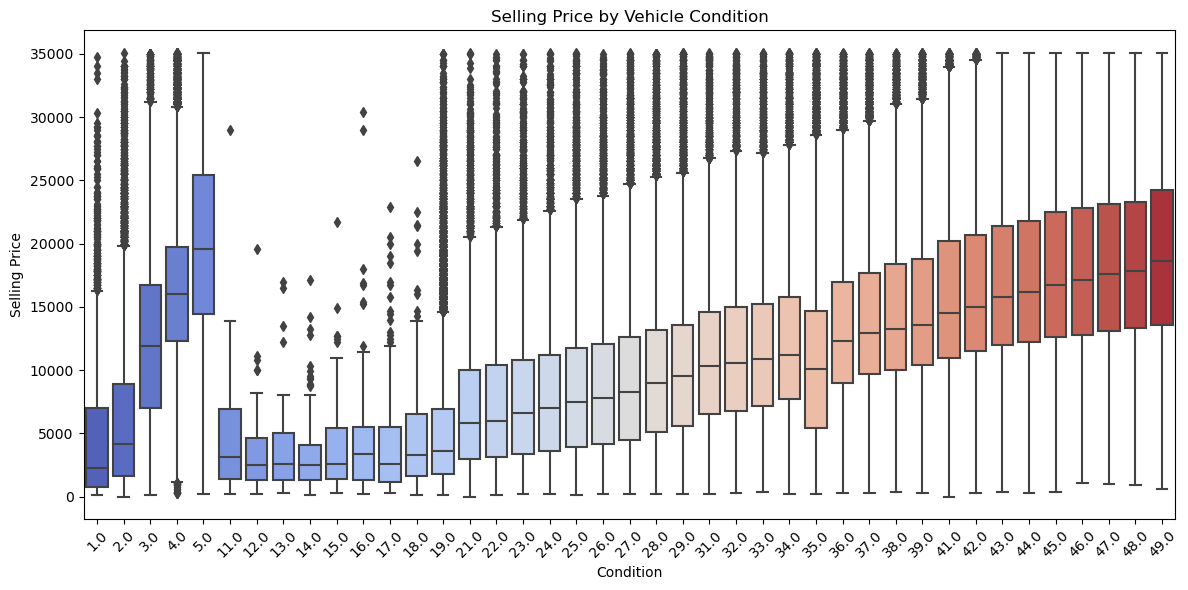

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='condition', y='sellingprice', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Selling Price by Vehicle Condition')
plt.xlabel('Condition')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

Key Observations
- Positive Correlation: As condition improves, selling price increases — a strong signal that buyers value well-maintained vehicles.
- Price Volatility at Lower Conditions: Wider boxes and longer whiskers at lower condition scores suggest more variability — possibly due to brand, mileage, or repair history.
- Tighter Spread at High Condition: Vehicles rated 4.5–5.0 show more consistent pricing, likely newer or certified pre-owned.

Text(0.5, 1.0, 'Selling Price by Top Colors')

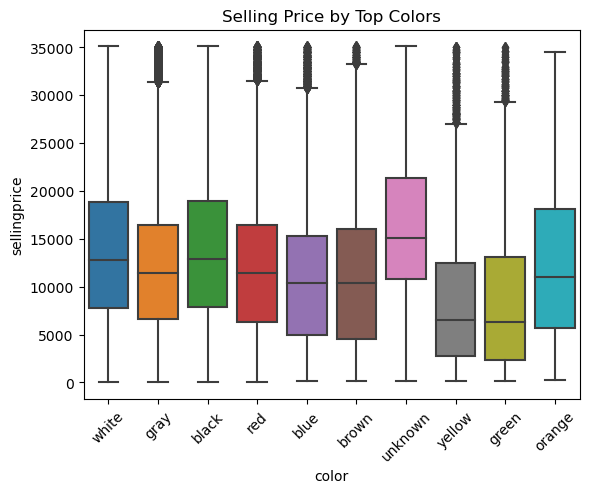

In [8]:
top_colors = df['color'].value_counts().head(10).index
sns.boxplot(x='color', y='sellingprice', data=df[df['color'].isin(top_colors)])
plt.xticks(rotation=45)
plt.title('Selling Price by Top Colors')

Key Insights
- White and black leads the pack: Vehicles in white/black tend to have a higher median selling price. This could reflect its popularity in fleet, luxury, or newer models.
- Orange, Gray and red are solid performers: These neutral tones show consistent pricing, likely due to broad market appeal and availability across trims.
- Brown and blue show more spread: These colors might appear in both economy and performance models, leading to wider price variability.
- 'Unknown' is a wildcard: This category likely includes missing or unstandardised entries, so its distribution may not reflect real market behaviour.

Text(0.5, 1.0, 'Selling Price by Interior Type')

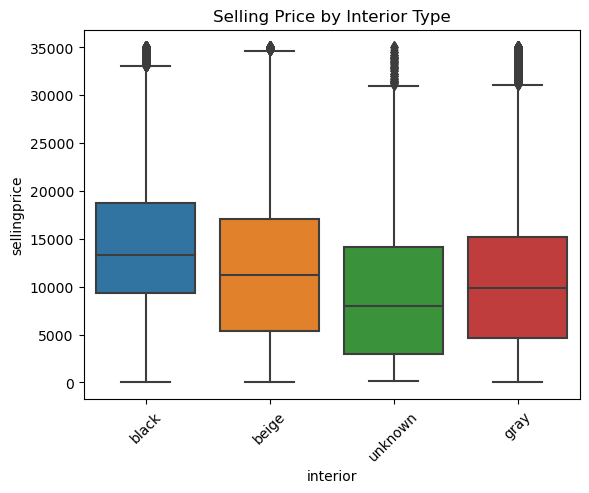

In [9]:
sns.boxplot(x='interior', y='sellingprice', data=df[df['interior'].isin(['black', 'beige', 'gray', 'unknown'])])
plt.xticks(rotation=45)
plt.title('Selling Price by Interior Type')

Key Insights
- Black and Beige Interiors Lead: These two have the highest median selling prices. Black is often associated with luxury and sport trims, while beige is common in premium or comfort-focused models.
- Gray is Mid-Tier: Slightly lower median than black/beige, but still consistent — often found in base or mid-range trims.
- 'Unknown' Lags Behind: Vehicles with missing or unstandardised interior data tend to have the lowest median prices. This could reflect older listings, incomplete records, or lower-value vehicles.
- Outliers Across All Types: Each category shows high-priced exceptions — likely due to brand, trim, or condition overriding interior influence.

Text(0.5, 1.0, 'Selling Price by Make')

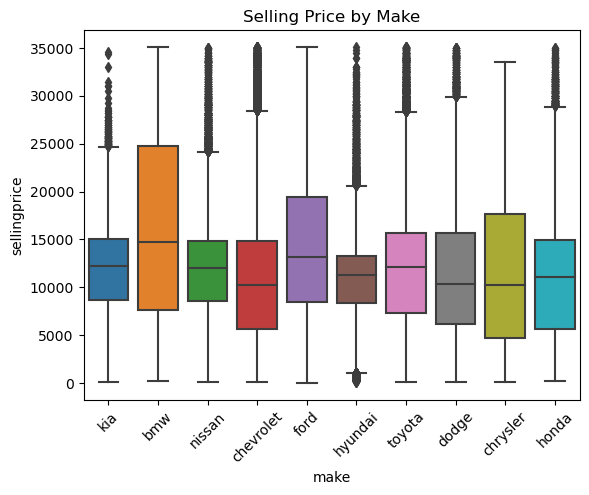

In [10]:
top_makes = df['make'].value_counts().head(10).index
sns.boxplot(x='make', y='sellingprice', data=df[df['make'].isin(top_makes)])
plt.xticks(rotation=45)
plt.title('Selling Price by Make')

Key Insights
- BMW stands out: It has the highest median selling price and the widest spread, indicating both premium models and high variability (e.g., base vs. M-series).
- Kia, Hyundai, and Nissan cluster lower: These brands are known for affordability and value, reflected in their lower median prices.
- Toyota, Dodge and Honda are mid-range: Consistent pricing with fewer outliers — likely due to strong resale reputation and reliability.
- Chevrolet and Ford show moderate spread: These brands span economy to performance (e.g., Spark vs. Mustang), which explains the variability.

Text(0.5, 1.0, 'Selling Price by Month of Sale')

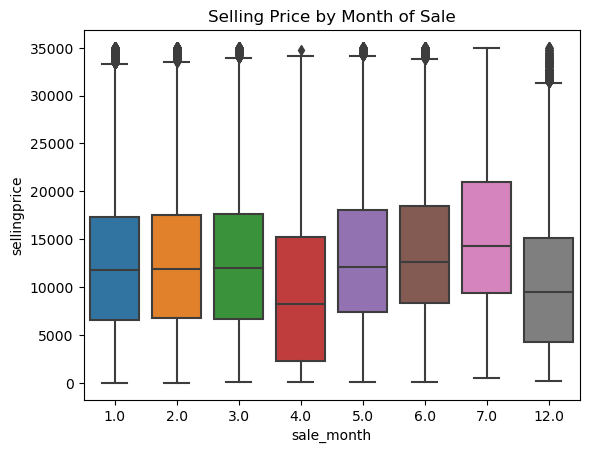

In [12]:
df['sale_month'] = df['saledate'].dt.month
sns.boxplot(x='sale_month', y='sellingprice', data=df)
plt.title('Selling Price by Month of Sale')

Key Insights
- June (6) and July (7) Show Higher Medians: These months appear to have slightly elevated selling prices. This could reflect:
1. Summer demand surge (e.g., family travel, school holidays)
2. Dealers prepping inventory before year-end models arrive
- April (4) and December (12) Dips: Lower median prices in December may be due to:
1. Year-end clearance sales
2. Lower consumer demand during holidays
3. Dealers may be clearing out older stock before summer demand picks up
- Months 1–3 Are Relatively Stable: No dramatic shifts, but moderate pricing — possibly reflecting steady post-holiday recovery and tax season purchases.
- Outliers in Every Month: High-priced vehicles are sold year-round, suggesting that luxury or rare listings aren’t season-bound.

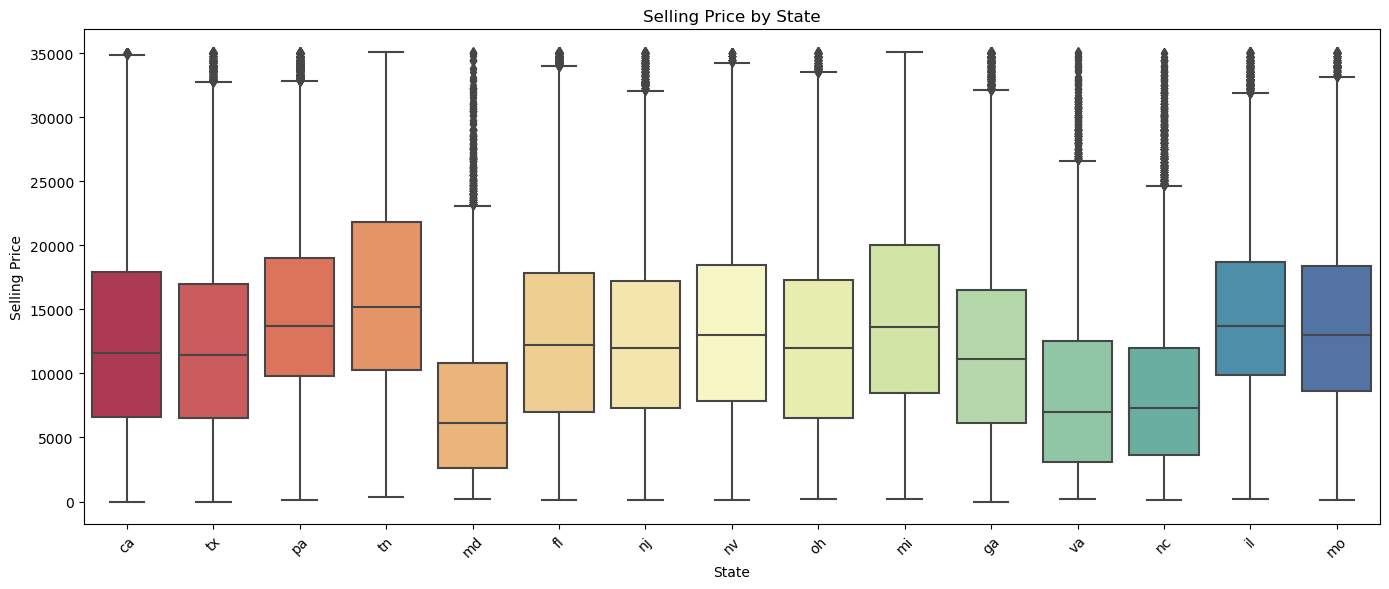

In [13]:
top_states = df['state'].value_counts().head(15).index

plt.figure(figsize=(14, 6))
sns.boxplot(x='state', y='sellingprice', data=df[df['state'].isin(top_states)], palette='Spectral')
plt.xticks(rotation=45)
plt.title('Selling Price by State')
plt.xlabel('State')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

Key Insights
- California (CA) leads in price: Higher median and wider spread suggest a mix of premium and economy vehicles — possibly due to a large, diverse market.
- Texas (TX) and Florida (FL): Also show strong pricing, likely reflecting demand for trucks, SUVs, and year-round driving conditions.
- Illinois (IL), Pennsylvania (PA), and Michigan (MI) show mid-range pricing with moderate variability — possibly reflecting mixed urban and suburban markets.
- Ohio (OH), Georgia (GA), and North Carolina (NC) tend to have lower median prices and tighter spreads — suggesting more budget-conscious or consistent resale markets.
- Outliers in every state: High-priced vehicles appear across the board, suggesting luxury or rare listings in all regions.

In [15]:
state_avg = df.groupby('state')['sellingprice'].mean().sort_values(ascending=False)
print(state_avg.head(10))

state
on    16297.881257
tn    15912.976527
co    14874.246667
pa    14693.221727
mi    14459.313345
il    14326.275594
mo    13846.573601
nv    13586.712402
wa    13549.676784
mn    13288.578660
Name: sellingprice, dtype: float64


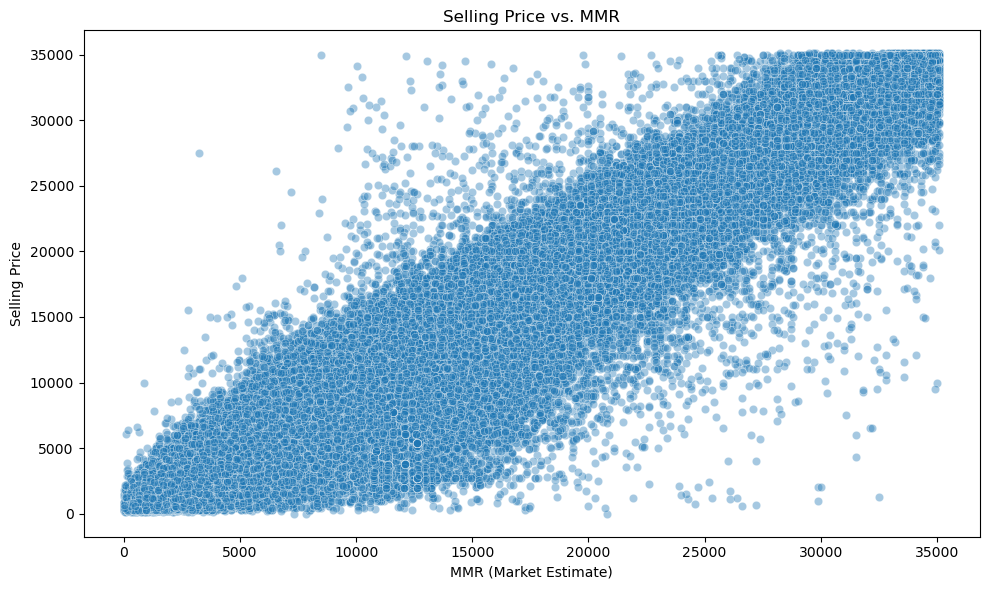

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='mmr', y='sellingprice', data=df, alpha=0.4)
plt.title('Selling Price vs. MMR')
plt.xlabel('MMR (Market Estimate)')
plt.ylabel('Selling Price')
plt.tight_layout()
plt.show()

Key Insights
- Positive Correlation: There's a clear upward trend — as MMR increases, selling prices tend to rise. This confirms that MMR is a reasonably good predictor of market value.
- Triangular Distribution: The dense cluster of points forms a wedge or triangle, with more dispersion at higher MMR values. This suggests:
1. Low-MMR vehicles are priced more consistently.
2. High-MMR vehicles show greater variability — likely due to brand, condition, or negotiation.
- Above vs. Below MMR:
1. Points above the diagonal indicate vehicles sold above market estimate — possibly due to upgrades, rare trims, or strong demand.
2. Points below the diagonal suggest undervalued sales — maybe due to poor condition, urgent liquidation, or mispricing.

Text(0.5, 1.0, 'Distribution of Selling Price - MMR')

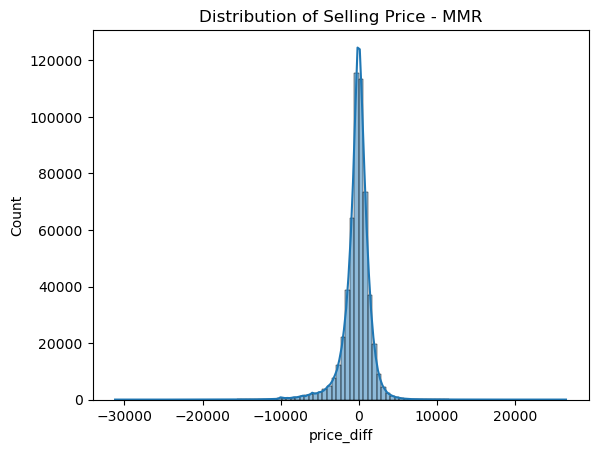

In [17]:
df['price_diff'] = df['sellingprice'] - df['mmr']
sns.histplot(df['price_diff'], bins=100, kde=True)
plt.title('Distribution of Selling Price - MMR')